In [1]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\Wamika


In [3]:
import numpy as np
import pandas as pd
import matplotlib as pyplot

In [4]:
#predict weather outcomes with original 3 states of weather defined
states = ["Sunny", "Cloudy", "Rainy"]

In [5]:
transition_matrix = [
    [0.7, 0.2, 0.1],  # From Sunny to [Sunny, Cloudy, Rainy]
    [0.3, 0.4, 0.3],  # From Cloudy to [Sunny, Cloudy, Rainy]
    [0.2, 0.3, 0.5]   # From Rainy to [Sunny, Cloudy, Rainy]
]
# Note that all probabilties in a single row in matrix add upto 1

In [9]:
# Set initial state
current_state = 0  # Let's start with "Sunny"

# Simulate transitions
def next_state(current_state, transition_matrix):
    return np.random.choice([0, 1, 2], p=transition_matrix[current_state])

days = 10
weather_forecast = [states[current_state]]

for _ in range(days):
    current_state = next_state(current_state, transition_matrix)
    weather_forecast.append(states[current_state])

print(weather_forecast)

['Sunny', 'Sunny', 'Sunny', 'Cloudy', 'Cloudy', 'Cloudy', 'Rainy', 'Rainy', 'Cloudy', 'Cloudy', 'Cloudy']


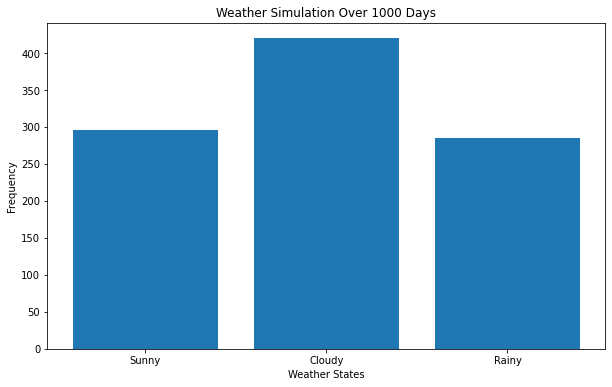

In [10]:
#simulate markov chains
days = 1000
weather_forecast = [states[current_state]]

for _ in range(days):
    current_state = next_state(current_state, transition_matrix)
    weather_forecast.append(states[current_state])

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(weather_forecast, bins=range(len(states) + 1), align='left', rwidth=0.8)
plt.xticks(range(len(states)), states)
plt.xlabel("Weather States")
plt.ylabel("Frequency")
plt.title("Weather Simulation Over 1000 Days")
plt.show()

In [12]:
#Calculating Steady-State Distribution

# Convert the transition matrix to a NumPy array
transition_matrix = np.array(transition_matrix)

# Calculate the steady-state distribution
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
steady_state = eigenvectors[:, np.isclose(eigenvalues, 1)]

# Normalize the steady-state distribution
steady_state = steady_state / steady_state.sum()

print(states)
print(steady_state.real.flatten())

['Sunny', 'Cloudy', 'Rainy']
[0.45652174 0.2826087  0.26086957]
